## Import Libraries & Loading Dataset

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = datasets.load_digits()

In [3]:
image_lebels = list(zip(data.images, data.target))

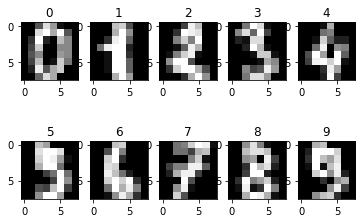

In [4]:
for index,(image,label) in enumerate(image_lebels[:10]):
    plt.subplot(2,5,index+1)
    plt.imshow(image,cmap="gray")
    plt.title(label)

c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

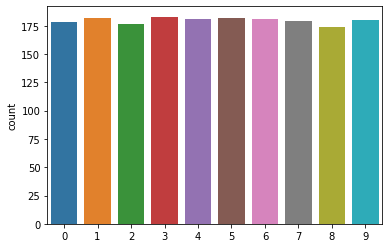

In [5]:
sns.countplot(data.target)

In [6]:
X = data.images.reshape(len(data.images),-1)
Y = data.target

In [7]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

# Model

### KNeighborsClassifier

In [8]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
predict_knn = knn.predict(x_test)

In [9]:
print(metrics.classification_report(y_test,predict_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      0.97      0.99        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        37
           8       1.00      1.00      1.00        29
           9       1.00      1.00      1.00        34

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


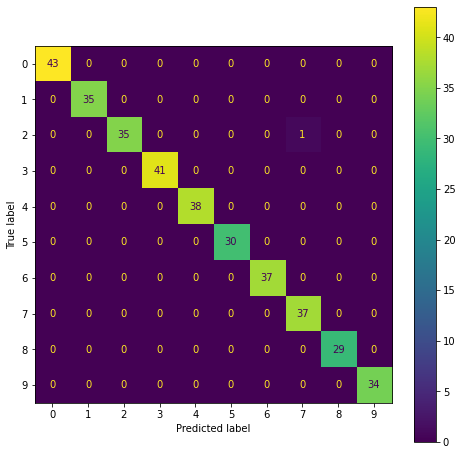

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
metrics.plot_confusion_matrix(knn,x_test,y_test,ax=ax)

### SVC

In [11]:
svc = SVC(C=3)
svc.fit(x_train,y_train)
predict_svc = svc.predict(x_test)

In [12]:
print(metrics.classification_report(y_test,predict_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      1.00      1.00        29
           9       0.97      0.97      0.97        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


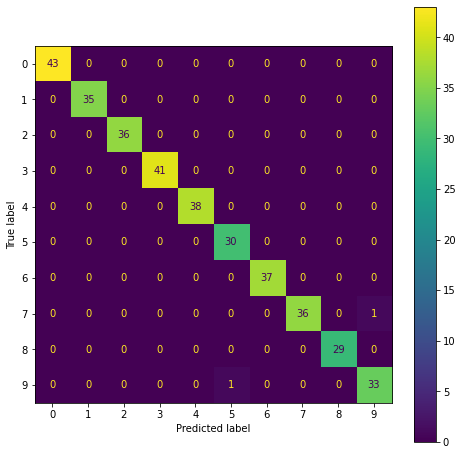

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
metrics.plot_confusion_matrix(svc,x_test,y_test,ax=ax)

### RandomForestClassifier

In [14]:
RF = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=2)
RF.fit(x_train,y_train)
predict_rf = RF.predict(x_test)

In [15]:
print(metrics.classification_report(y_test,predict_rf))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       0.95      1.00      0.97        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      1.00      1.00        29
           9       0.97      0.97      0.97        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


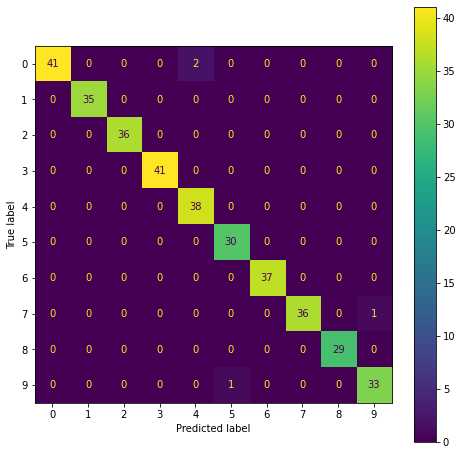

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
metrics.plot_confusion_matrix(RF,x_test,y_test,ax=ax)

### CatBoostClassifier

In [17]:
catboost = CatBoostClassifier(iterations=200,learning_rate=0.17,eval_metric="Accuracy",task_type="GPU",random_state=0)
catboost.fit(x_train,y_train,[],eval_set=(x_test,y_test))

0:	learn: 0.7223382	test: 0.6944444	best: 0.6944444 (0)	total: 19.5ms	remaining: 3.88s
1:	learn: 0.7807933	test: 0.7305556	best: 0.7305556 (1)	total: 37ms	remaining: 3.66s
2:	learn: 0.8239388	test: 0.8055556	best: 0.8055556 (2)	total: 52.3ms	remaining: 3.44s
3:	learn: 0.8629088	test: 0.8250000	best: 0.8250000 (3)	total: 68.5ms	remaining: 3.36s
4:	learn: 0.8705637	test: 0.8305556	best: 0.8305556 (4)	total: 84.8ms	remaining: 3.31s
5:	learn: 0.8782185	test: 0.8527778	best: 0.8527778 (5)	total: 102ms	remaining: 3.28s
6:	learn: 0.8990953	test: 0.8722222	best: 0.8722222 (6)	total: 118ms	remaining: 3.24s
7:	learn: 0.9123173	test: 0.8833333	best: 0.8833333 (7)	total: 135ms	remaining: 3.25s
8:	learn: 0.9227557	test: 0.9000000	best: 0.9000000 (8)	total: 152ms	remaining: 3.22s
9:	learn: 0.9269311	test: 0.9027778	best: 0.9027778 (9)	total: 169ms	remaining: 3.2s
10:	learn: 0.9345859	test: 0.9055556	best: 0.9055556 (10)	total: 186ms	remaining: 3.19s
11:	learn: 0.9429367	test: 0.9166667	best: 0.91666

In [18]:
catboost.best_score_

{'learn': {'Accuracy': 1.0, 'MultiClass': 0.02079341970721134},
 'validation': {'Accuracy': 0.9833333333333333,
  'MultiClass': 0.09238155153062609}}

In [19]:
predict_cat = catboost.predict(x_test)

c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


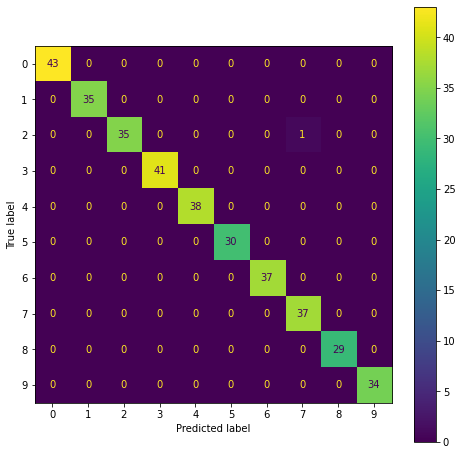

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
metrics.plot_confusion_matrix(knn,x_test,y_test,ax=ax)

In [21]:
acc = [{"Algorithm":"KNeighbors",'Accuracy': metrics.accuracy_score(y_test,predict_knn),'Precision': metrics.precision_score(y_test,predict_knn,average='macro'),'Recall': metrics.recall_score(y_test,predict_knn,average='macro'),'F1-score': metrics.f1_score(y_test,predict_knn,average='macro')},
       {"Algorithm":"SVM", 'Accuracy': metrics.accuracy_score(y_test,predict_svc),'Precision': metrics.precision_score(y_test,predict_svc,average='macro'),'Recall': metrics.recall_score(y_test,predict_svc,average='macro'),'F1-score': metrics.f1_score(y_test,predict_svc,average='macro')},
        {"Algorithm":"RandomForest",'Accuracy': metrics.accuracy_score(y_test,predict_rf),'Precision': metrics.precision_score(y_test,predict_rf,average='macro'),'Recall': metrics.recall_score(y_test,predict_rf,average='macro'),'F1-score': metrics.f1_score(y_test,predict_rf,average='macro')},
        {"Algorithm":"Catboost",'Accuracy': metrics.accuracy_score(y_test,predict_cat),'Precision': metrics.precision_score(y_test,predict_cat,average='macro'),'Recall': metrics.recall_score(y_test,predict_cat,average='macro'),'F1-score': metrics.f1_score(y_test,predict_cat,average='macro')}
       ] 

In [22]:
accurac = pd.DataFrame.from_dict(acc)
accurac

,Algorithm,Accuracy,Precision,Recall,F1-score
0,KNeighbors,0.997222,0.997368,0.997222,0.997258
1,SVM,0.994444,0.993833,0.994356,0.994050
2,RandomForest,0.988889,0.988833,0.989705,0.989105
3,Catboost,0.983333,0.982772,0.982766,0.982441
